Introduction to Online Shopping Intention Analysis

In recent years, e-commerce has brought huge benefits to suppliers and consumers. Defined as the use of the Internet to sell products or services to individual consumers, e-commerce has profoundly changed the way people conduct their business.


Indeed, it has become an important full-fledged transaction channel. A recent survey of online shopping predicted that the total amount of direct sales to customers will exceed $ 240 billion by 2007. Major technological innovations in online shopping have changed transaction channels in the information age.

With the growth of online shopping, it has become important to understand the factors that influence a consumer’s intention to buy from a website rather than just browse. This emerging topic is of interest to both academics and machine learning practitioners.

Importing depenencies

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py  #avanced version an make graph with interactive tools
import plotly.graph_objs as go

Getting The Data

In [5]:
df = pd.read_csv('online_shoppers_intention.csv')

Gettting basic idea of the data

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [11]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [8]:
df.shape

(12330, 18)

In [10]:
df.isnull().sum()    #so the is no null values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [19]:
# fining the unique value for each column
for col in df.select_dtypes(include='object').columns:
    print("unique_values of",col,"is = ",df[col].unique())

unique_values of Month is =  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
unique_values of VisitorType is =  ['Returning_Visitor' 'New_Visitor' 'Other']


 Target Variable Analysis

In [25]:
print(df['Revenue'].value_counts(normalize=True))
print(df['Revenue'].value_counts())

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [29]:
# change revenu to  true andd false values
df['Revenue'] = df['Revenue'].astype('Int64')

 Correlation Matrix (for numeric columns)

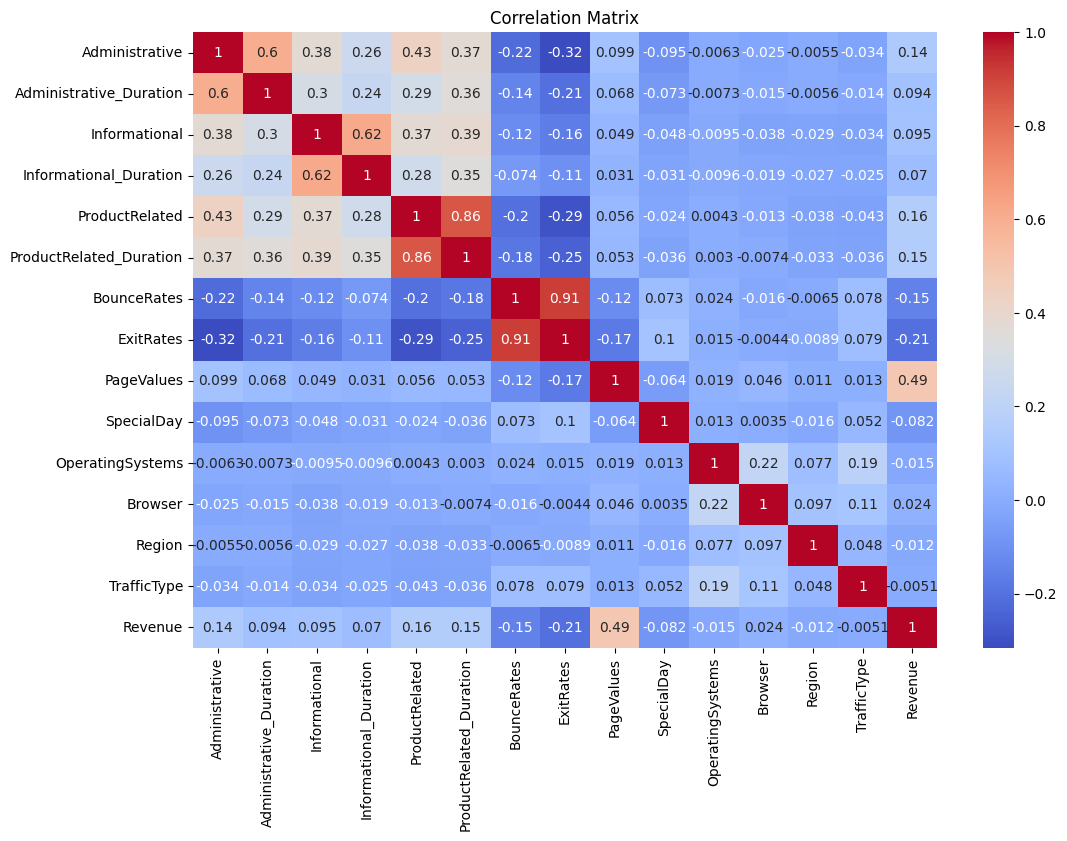

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


visualization

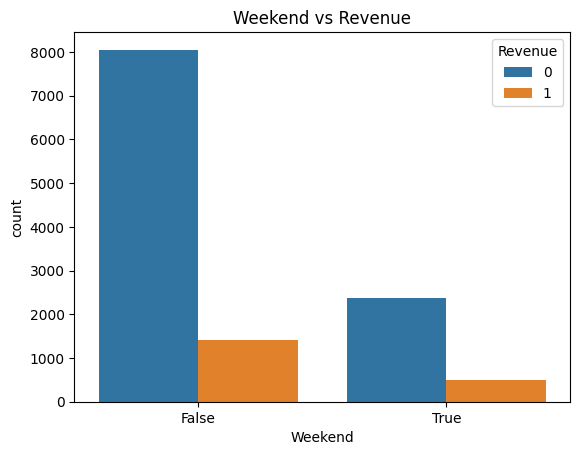

In [31]:
#A. Count plot of target vs categorical feature
sns.countplot(x='Weekend', hue='Revenue', data=df)
plt.title('Weekend vs Revenue')
plt.show()


Bar chart showing how many users bought (Revenue=True) or did not buy (Revenue=False).

It groups by the 'Weekend' column (True/False): whether the session happened on a weekend.

B. Boxplot of numeric feature vs target

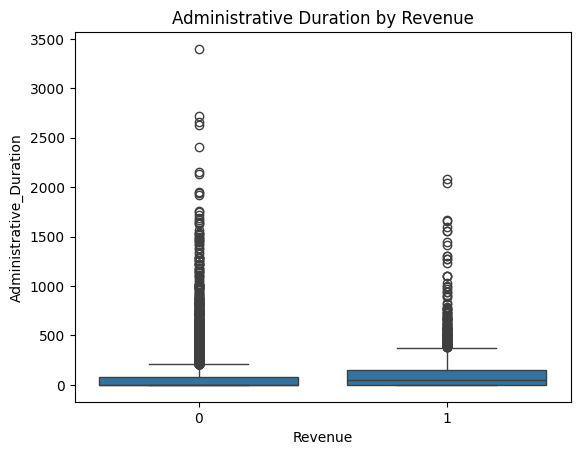

In [32]:
sns.boxplot(x='Revenue', y='Administrative_Duration', data=df)
plt.title('Administrative Duration by Revenue')
plt.show()


💡 What It Shows:

    Compares time spent on administrative pages between buyers and non-buyers.

    Each box shows distribution: median, quartiles, and outliers.

C. Pair Plot (only for selected features)

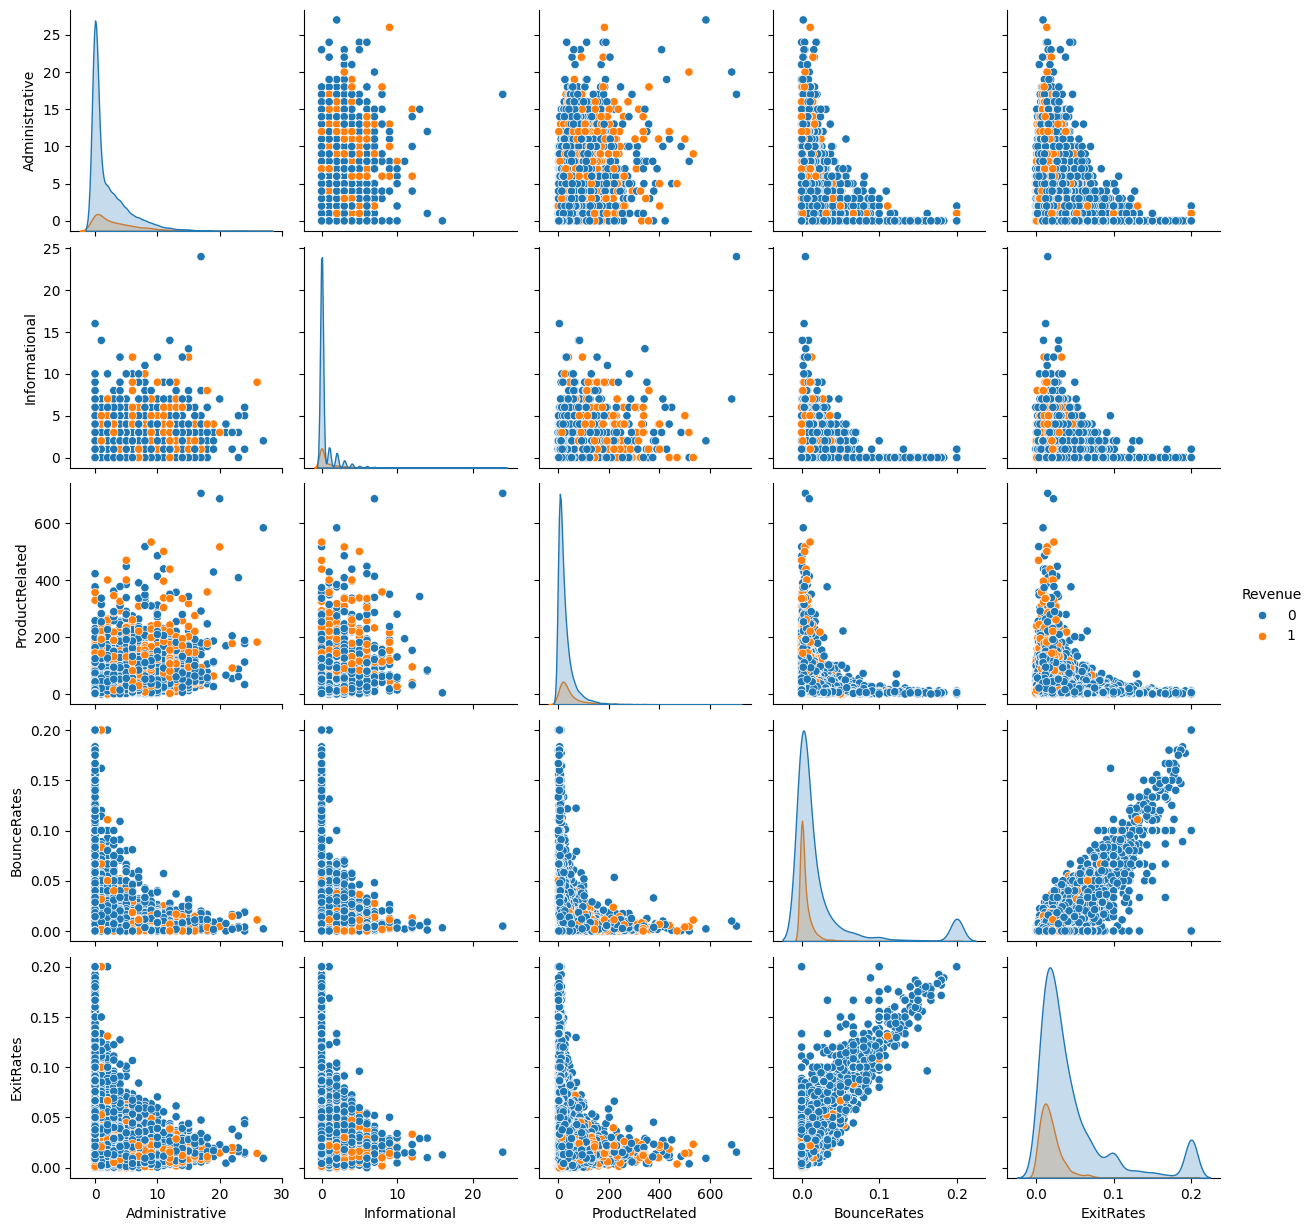

In [33]:
sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'Revenue']], hue='Revenue')
plt.show()


💡 What It Shows:

    Compares multiple numeric features (2D scatter plots between each pair)

    Points are colored by Revenue (buyers vs non-buyers)

    Also includes histograms on the diagonal

Creating moel


In [34]:
!pip install imbalanced-learn


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [37]:
# 2. Encode Categorical Variables
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


In [38]:
#Split Data into Features and Target
X = df_encoded.drop("Revenue", axis=1)  # Features
y = df_encoded["Revenue"]               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)                     # Initialize SMOTE
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)  # Apply it to feature and target


c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\subp

In [40]:
model = RandomForestClassifier()



In [41]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [45]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      2055
         1.0       0.75      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.89      0.89      0.89      2466



Comparing all the models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(class_weight="balanced", probability=True, random_state=42)
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (1)": report["1.0"]["precision"],
        "Recall (1)": report["1.0"]["recall"],
        "F1-score (1)": report["1.0"]["f1-score"]
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).sort_values(by="F1-score (1)", ascending=False)
print(df_results)


c:\Users\athun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0     Logistic Regression  0.860908       0.561818    0.751825      0.643080
1           Random Forest  0.890511       0.749117    0.515815      0.610951
2           Decision Tree  0.860097       0.588710    0.532847      0.559387
4  Support Vector Machine  0.705596       0.332625    0.761557      0.463018
3     K-Nearest Neighbors  0.849959       0.613260    0.270073      0.375000


    Logistic Regression

        Balanced between precision and recall

        Best F1-score (64.3%) for predicting buyers

        Slightly lower accuracy than Random Forest, but better recall (finds more actual buyers)

🔍 Other Insights:

    Random Forest has the highest accuracy (89%) and precision for buyers, but low recall → may miss many actual buyers.

    SVM finds many buyers (high recall) but makes many mistakes (low precision) → useful if recall is most important.

    KNN and Decision Tree perform moderately but not better than the above.

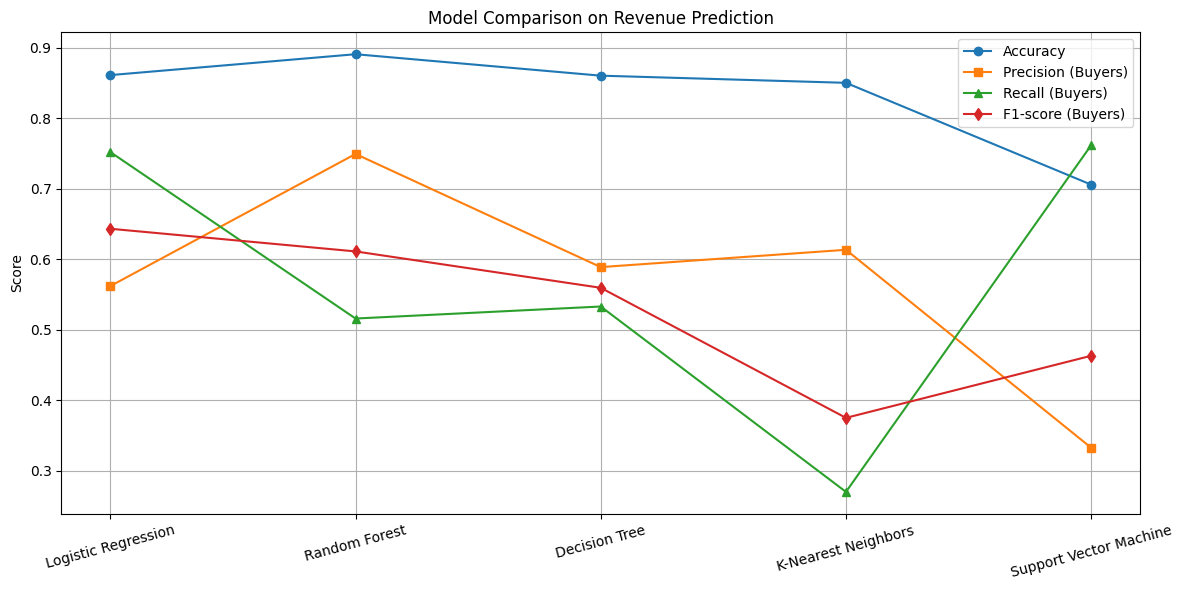

In [47]:
import matplotlib.pyplot as plt

# Model names and their scores
model_names = [
    "Logistic Regression",
    "Random Forest",
    "Decision Tree",
    "K-Nearest Neighbors",
    "Support Vector Machine"
]

accuracy = [0.860908, 0.890511, 0.860097, 0.849959, 0.705596]
precision = [0.561818, 0.749117, 0.588710, 0.613260, 0.332625]
recall = [0.751825, 0.515815, 0.532847, 0.270073, 0.761557]
f1_score = [0.643080, 0.610951, 0.559387, 0.375000, 0.463018]

# Plot
plt.figure(figsize=(12, 6))
x = range(len(model_names))

plt.plot(x, accuracy, marker='o', label='Accuracy')
plt.plot(x, precision, marker='s', label='Precision (Buyers)')
plt.plot(x, recall, marker='^', label='Recall (Buyers)')
plt.plot(x, f1_score, marker='d', label='F1-score (Buyers)')

plt.xticks(x, model_names, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison on Revenue Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
import tensorflow as tf 


ModuleNotFoundError: No module named 'tensorflow'

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate performance
report = classification_report(y_test, y_pred)
print(report)


ModuleNotFoundError: No module named 'tensorflow'